#Battery Drain Prediction

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('dummy_battery_data.csv')

In [4]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d-%m-%Y %H:%M', dayfirst=True)

In [5]:
data

,Timestamp,Battery Level (%),Screen On Time (minutes),App Usage (minutes),WiFi Status,Network Status,GPS Status,CPU Usage (%),Device Temperature,Battery Drain Rate (%/hour),Screen Brightness Level (%)
0,2024-01-01 00:00:00,61,10,83,Connected,4G,On,5.029403,29.974253,4.942397,75
1,2024-01-01 01:00:00,24,104,150,Disconnected,4G,Off,44.180107,32.508690,4.081556,37
2,2024-01-01 02:00:00,81,13,127,Disconnected,5G,Off,40.666767,34.685876,5.918287,10
3,2024-01-01 03:00:00,70,59,125,Disconnected,4G,Off,33.229802,32.658556,1.822179,11
4,2024-01-01 04:00:00,30,29,44,Disconnected,5G,Off,38.761959,26.799294,7.809819,41
...,...,...,...,...,...,...,...,...,...,...,...
995,2024-02-11 11:00:00,73,170,62,Disconnected,5G,Off,39.409293,38.666808,4.657298,38
996,2024-02-11 12:00:00,31,177,108,Disconnected,4G,On,11.601280,37.307613,5.365656,62
997,2024-02-11 13:00:00,69,150,118,Disconnected,5G,On,36.064528,36.400524,5.867444,78
998,2024-02-11 14:00:00,73,171,20,Disconnected,5G,Off,47.526083,25.731495,8.365246,25


In [6]:
label_encoders = {}
categorical_features = ['WiFi Status', 'Network Status', 'GPS Status']
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [7]:
features = ['Battery Level (%)', 'Screen On Time (minutes)', 'App Usage (minutes)', 'CPU Usage (%)', 'Device Temperature', 'Screen Brightness Level (%)'] + categorical_features
scaler = StandardScaler()


In [8]:
print(data.columns)


Index(['Timestamp', 'Battery Level (%)', 'Screen On Time (minutes)',
       'App Usage (minutes)', 'WiFi Status', 'Network Status', 'GPS Status',
       'CPU Usage (%)', 'Device Temperature', 'Battery Drain Rate (%/hour)',
       'Screen Brightness Level (%)'],
      dtype='object')


In [9]:
data[features] = scaler.fit_transform(data[features])
data = data.dropna()

In [10]:
def create_sequences(data, sequence_length, target_col):
    sequences = []
    targets = []
    data_array = data.to_numpy()
    for i in range(len(data_array) - sequence_length):
        seq = data_array[i:i+sequence_length, :].astype(np.float32)
        label = data_array[i+sequence_length, target_col].astype(np.float32)
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)


In [11]:
sequence_length = 10
target_col = data.columns.get_loc('Battery Drain Rate (%/hour)')
X, y = create_sequences(data.drop(columns=['Timestamp']), sequence_length, target_col)
X, y

(array([[[ 0.29330146, -1.4665025 , -0.17493549, ..., -0.57244045,
           4.9423966 ,  0.89154476],
         [-1.1107811 ,  0.30057183,  1.1061529 , ...,  0.01300877,
           4.0815563 , -0.43849218],
         [ 1.0522649 , -1.4101065 ,  0.6663763 , ...,  0.51593375,
           5.9182873 , -1.3835185 ],
         ...,
         [ 1.1661094 , -1.5792946 ,  1.6224123 , ...,  1.2633027 ,
           2.69409   , -1.3835185 ],
         [ 1.1661094 , -0.11299877,  0.5898934 , ..., -1.2457416 ,
           2.658238  , -0.50849414],
         [ 1.6594357 ,  0.6389478 ,  0.4942898 , ...,  1.5785061 ,
           1.5130215 ,  0.05152143]],
 
        [[-1.1107811 ,  0.30057183,  1.1061529 , ...,  0.01300877,
           4.0815563 , -0.43849218],
         [ 1.0522649 , -1.4101065 ,  0.6663763 , ...,  0.51593375,
           5.9182873 , -1.3835185 ],
         [ 0.634835  , -0.545368  ,  0.62813485, ...,  0.04762756,
           1.8221792 , -1.3485174 ],
         ...,
         [ 1.1661094 , -0.1129987

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [14]:

# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))


In [15]:
from tensorflow.keras.layers import LSTM, Dense, Attention, Concatenate, Input
from tensorflow.keras.models import Model

input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
lstm_out = LSTM(50, return_sequences=True)(input_layer)
attention = Attention()([lstm_out, lstm_out])
concatenated = Concatenate(axis=-1)([lstm_out, attention])
lstm_out_2 = LSTM(50, return_sequences=False)(concatenated)
output_layer = Dense(1)(lstm_out_2)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.0471 - val_loss: 0.9772
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0374 - val_loss: 0.9776
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0176 - val_loss: 1.0076
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9921 - val_loss: 0.9822
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0689 - val_loss: 0.9848
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0998 - val_loss: 0.9745
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0333 - val_loss: 0.9720
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9911 - val_loss: 0.9755
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9087 - val_loss: 0.9782
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9947 - val_loss: 0.9799
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9178 - val_loss: 0.9874
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9229 - val_l

In [16]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0714 - val_loss: 1.5069
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0693 - val_loss: 1.5324
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0470 - val_loss: 1.5115
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0469 - val_loss: 1.5153
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0420 - val_loss: 1.4970
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0402 - val_loss: 1.5232
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0366 - val_loss: 1.5110
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0273 - val_loss: 1.5249
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0253 - val_loss: 1.5201
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0242 - val_loss: 1.5399
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0214 - val_loss: 1.5567
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0180 - val_l

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6252 
Test Loss: 1.6193791627883911
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


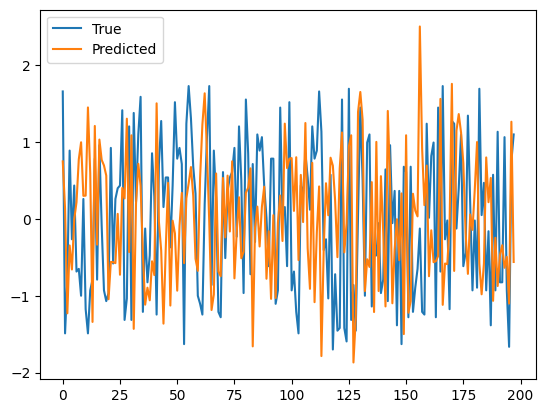

In [17]:

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
predictions = model.predict(X_test)
import matplotlib.pyplot as plt
plt.plot(y_test, label='True')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()


#Battery Usage Profiling and Visualization:

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


file_path = './dummy_battery_data.csv'
battery_data = pd.read_csv(file_path)


battery_data['Timestamp'] = pd.to_datetime(battery_data['Timestamp'])

first_24_hours_data = battery_data.head(24)


features = first_24_hours_data[['Screen On Time (minutes)', 'App Usage (minutes)', 'CPU Usage (%)',
                                'Device Temperature', 'Battery Drain Rate (%/hour)', 'Screen Brightness Level (%)']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering (assuming 3 profiles)
kmeans = KMeans(n_clusters=3, random_state=42)
first_24_hours_data['Profile'] = kmeans.fit_predict(scaled_features)

profile_labels = {
    0: {
        'label': "Heavy App Users",
        'description': "High app usage causing battery drain.",
        'reason': lambda row: "High app usage with screen on time."
    },
    1: {
        'label': "Background Drainers",
        'description': "Battery drain due to background processes.",
        'reason': lambda row: "High battery drain rate with low app usage."
    },
    2: {
        'label': "Heat-Prone Users",
        'description': "High device temperature, moderate usage.",
        'reason': lambda row: "High device temperature with moderate CPU usage."
    }
}


first_24_hours_data['Profile Label'] = first_24_hours_data['Profile'].map(lambda x: profile_labels[x]['label'])
first_24_hours_data['Profile Reason'] = first_24_hours_data.apply(lambda row: profile_labels[row['Profile']]['reason'](row), axis=1)

first_24_hours_data['Profile Y-Label'] = first_24_hours_data['Profile Label'] + " - " + first_24_hours_data['Profile Reason']

hourly_profiles = first_24_hours_data['Profile Y-Label'].tolist()

plt.figure(figsize=(14, 8))
sns.lineplot(x=range(1, len(hourly_profiles) + 1), y=hourly_profiles, marker="o")

plt.title("Profile Changes During the First 24 Hours with Reasons", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=14)
plt.ylabel("Profile and Reason", fontsize=14)
plt.xticks(range(1, len(hourly_profiles) + 1))
plt.yticks(hourly_profiles)
plt.grid(True)
plt.show()


ValueError: time data "13-01-2024 00:00" doesn't match format "%m-%d-%Y %H:%M", at position 288. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.